<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Deep%20Learning/DataCamp/Introduction%20to%20Deep%20Learning%20in%20Python/4%20Fine-tuning%20keras%20models/4_Fine_tuning_keras_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-tuning keras models

Learn how to optimize your deep learning models in Keras. Start by learning how to validate your models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks. 

# Understanding model optimization

1. Understanding model optimization

At this point, you have a good understanding of how neural networks work, and how to build them in Keras. But you probably don't yet have a great intuition for how to choose things like model architecture and model optimization arguments. You'll learn that in this last chapter.
2. Why optimization is hard

In practice, optimization is a hard problem. The optimal value for any one weight depends on the values of the other weights, and we are optimizing many weights at once. Even if the slope tells us which weights to increase, and which to decrease, our updates may not improve our model meaningfully. A small learning rate might cause us to make such small updates to the model's weights that our model doesn't improve materially. A very large learning rate might take us too far in the direction that seemed good. A smart optimizer like Adam helps, but optimization problems can still occur. The easiest way to see the effect of different learning rates is to use the simplest optimizer,
3. Stochastic gradient descent

Stochastic Gradient Descent, sometimes abbreviated to SGD. This optimizer uses a fixed learning rate. Learning rates around point-01 are common. But you can specify the learning rate you need with lr argument as shown here. We have a function that creates a new model here. We create models in a for loop, and each time around we compile the model using SGD with a different learning rate. We pass in the optimizer with the same argument where we previously passed the string for "Adam". In an exercise, you will compare the results of training models trained with low, medium and high learning rates. Even if your learning rate is well tuned, you can run into the so-called
4. The dying neuron problem

"dying-neuron" problem. This problem occurs when a neuron takes a value less than 0 for all rows of your data. Recall that, with the ReLU activation function, any node with a negative input value produces an output of 0, and it also has a slope of 0 as you see in this graph. Because the slope is 0, the slope of any weights flowing into that node are also 0. So those weights don't get updated. In other words, once the node starts always getting negative inputs, it may continue only getting negative inputs. It's contributing nothing to the model at this point, and hence the claim that the node or neuron is "dead."At first, this might suggest using an activation function whose slope is never exactly zero. However, those types of functions were used for many years.
5. Vanishing gradients

For example, in an earlier video we used an s-shaped function called tanh. However, values that were outside the middle of the S were
6. Vanishing gradients

relatively flat, or had small slopes. A small but non-zero slope might work in a network with only a few hidden layers. But in a deep network, one with many layers, the repeated multiplication of small slopes causes the slopes to get close to 0, which meant updates in backprop were close to 0. This is called the vanishing gradient problem. This in turn might suggest using an activation function that isn't even close to flat anywhere. There is research in this area, including variations on ReLU. Those aren't widely used though. For now, it's a phenomenon worth keeping in mind if you are ever pondering why your model isn't training better. If it happens, changing the activation function may be the solution. -
7. Let's practice!

# Diagnosing optimization problems

Which of the following could prevent a model from showing an improved loss in its first few epochs?

Possible Answers

1. Learning rate too low.
 - Incorrect - A learning rate that is too low could indeed prevent a model from showing an improved loss in its first few epochs, but this is not the only correct option.

2. Learning rate too high.
 - Incorrect - You are correct that a very high learning rate could prevent a model from showing an improved loss in its first few epochs, but this is not the only correct option.

3. Poor choice of activation function.
 - Yes, a poor choice of activation function could prevent a model from showing an improved loss in its first few epochs. What about the learning rates?

4. All of the above.
 - Correct - Well done! All the options listed could prevent a model from showing an improved loss in its first few epochs.'

# Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

Instructions

1. Import SGD from keras.optimizers.

2. Create a list of learning rates to try optimizing with called lr_to_test. The learning rates in it should be .000001, 0.01, and 1.
    
3. Using a for loop to iterate over lr_to_test:

 - Use the get_new_model() function to build a new, unoptimized model.

 - Create an optimizer called my_optimizer using the SGD() constructor with keyword argument lr=lr.

 - Compile your model. Set the optimizer parameter to be the SGD object you created above, and because this is a classification problem, use 'categorical_crossentropy' for the loss parameter.

 - Fit your model using the predictors and target.


In [ ]:
In [1]:
get_new_model??
Signature: get_new_model(input_shape=(10,))
Source:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

File:      /tmp/tmpcv2_nab1/<ipython-input-1-d515abca99e9>
Type:      function

In [ ]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1.0]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)

'''
<script.py> output:
    
    
    Testing model with learning rate: 0.000001
    
    Epoch 1/10
    
 32/891 [>.............................] - ETA: 0s - loss: 3.6053
672/891 [=====================>........] - ETA: 0s - loss: 3.6398
891/891 [==============================] - 0s - loss: 3.6057     
    Epoch 2/10
    
 32/891 [>.............................] - ETA: 0s - loss: 3.5751
416/891 [=============>................] - ETA: 0s - loss: 3.6402
891/891 [==============================] - 0s - loss: 3.5656     
    Epoch 3/10
    
 32/891 [>.............................] - ETA: 0s - loss: 2.6692
672/891 [=====================>........] - ETA: 0s - loss: 3.4949
891/891 [==============================] - 0s - loss: 3.5255     
    Epoch 4/10
    
 32/891 [>.............................] - ETA: 0s - loss: 3.0058
672/891 [=====================>........] - ETA: 0s - loss: 3.4932
891/891 [==============================] - 0s - loss: 3.4854     
    Epoch 5/10
    
 32/891 [>.............................] - ETA: 0s - loss: 2.5452
448/891 [==============>...............] - ETA: 0s - loss: 3.5022
891/891 [==============================] - 0s - loss: 3.4454     
    Epoch 6/10
    
 32/891 [>.............................] - ETA: 0s - loss: 3.4446
768/891 [========================>.....] - ETA: 0s - loss: 3.4073
891/891 [==============================] - 0s - loss: 3.4056     
    Epoch 7/10
    
 32/891 [>.............................] - ETA: 0s - loss: 4.1073
800/891 [=========================>....] - ETA: 0s - loss: 3.4131
891/891 [==============================] - 0s - loss: 3.3659     
    Epoch 8/10
    
 32/891 [>.............................] - ETA: 0s - loss: 3.0972
768/891 [========================>.....] - ETA: 0s - loss: 3.2904
891/891 [==============================] - 0s - loss: 3.3263     
    Epoch 9/10
    
 32/891 [>.............................] - ETA: 0s - loss: 3.7464
800/891 [=========================>....] - ETA: 0s - loss: 3.2714
891/891 [==============================] - 0s - loss: 3.2867     
    Epoch 10/10
    
 32/891 [>.............................] - ETA: 0s - loss: 3.3862
736/891 [=======================>......] - ETA: 0s - loss: 3.1780
891/891 [==============================] - 0s - loss: 3.2473     
    
    
    Testing model with learning rate: 0.010000
    
    Epoch 1/10
    
 32/891 [>.............................] - ETA: 1s - loss: 1.0910
640/891 [====================>.........] - ETA: 0s - loss: 1.6905
891/891 [==============================] - 0s - loss: 1.4069     
    Epoch 2/10
    
 32/891 [>.............................] - ETA: 0s - loss: 2.1145
576/891 [==================>...........] - ETA: 0s - loss: 0.7433
891/891 [==============================] - 0s - loss: 0.7036     
    Epoch 3/10
    
 32/891 [>.............................] - ETA: 0s - loss: 0.5716
704/891 [======================>.......] - ETA: 0s - loss: 0.6517
891/891 [==============================] - 0s - loss: 0.6469     
    Epoch 4/10
    
 32/891 [>.............................] - ETA: 0s - loss: 0.6275
416/891 [=============>................] - ETA: 0s - loss: 0.6474
800/891 [=========================>....] - ETA: 0s - loss: 0.6265
891/891 [==============================] - 0s - loss: 0.6185     
    Epoch 5/10
    
 32/891 [>.............................] - ETA: 0s - loss: 0.5038
512/891 [================>.............] - ETA: 0s - loss: 0.6069
891/891 [==============================] - 0s - loss: 0.6255     
    Epoch 6/10
    
 32/891 [>.............................] - ETA: 0s - loss: 0.6622
512/891 [================>.............] - ETA: 0s - loss: 0.6041
891/891 [==============================] - 0s - loss: 0.5998     
    Epoch 7/10
    
 32/891 [>.............................] - ETA: 0s - loss: 0.6197
736/891 [=======================>......] - ETA: 0s - loss: 0.6005
891/891 [==============================] - 0s - loss: 0.5974     
    Epoch 8/10
    
 32/891 [>.............................] - ETA: 0s - loss: 0.6083
544/891 [=================>............] - ETA: 0s - loss: 0.5818
891/891 [==============================] - 0s - loss: 0.6040     
    Epoch 9/10
    
 32/891 [>.............................] - ETA: 0s - loss: 0.6553
704/891 [======================>.......] - ETA: 0s - loss: 0.5909
891/891 [==============================] - 0s - loss: 0.5907     
    Epoch 10/10
    
 32/891 [>.............................] - ETA: 0s - loss: 0.6393
672/891 [=====================>........] - ETA: 0s - loss: 0.5783
891/891 [==============================] - 0s - loss: 0.5824     
    
    
    Testing model with learning rate: 1.000000
    
    Epoch 1/10
    
 32/891 [>.............................] - ETA: 1s - loss: 1.0273
384/891 [===========>..................] - ETA: 0s - loss: 5.3744
704/891 [======================>.......] - ETA: 0s - loss: 5.7018
891/891 [==============================] - 0s - loss: 5.9885     
    Epoch 2/10
    
 32/891 [>.............................] - ETA: 0s - loss: 4.5332
512/891 [================>.............] - ETA: 0s - loss: 6.0128
891/891 [==============================] - 0s - loss: 6.1867     
    Epoch 3/10
    
 32/891 [>.............................] - ETA: 0s - loss: 7.0517
416/891 [=============>................] - ETA: 0s - loss: 5.9280
832/891 [===========================>..] - ETA: 0s - loss: 6.2380
891/891 [==============================] - 0s - loss: 6.1867     
    Epoch 4/10
    
 32/891 [>.............................] - ETA: 0s - loss: 6.0443
480/891 [===============>..............] - ETA: 0s - loss: 6.2793
891/891 [==============================] - 0s - loss: 6.1867     
    Epoch 5/10
    
 32/891 [>.............................] - ETA: 0s - loss: 9.0664
576/891 [==================>...........] - ETA: 0s - loss: 6.0723
891/891 [==============================] - 0s - loss: 6.1867     
    Epoch 6/10
    
 32/891 [>.............................] - ETA: 0s - loss: 6.0443
448/891 [==============>...............] - ETA: 0s - loss: 6.3681
891/891 [==============================] - 0s - loss: 6.1867     
    Epoch 7/10
    
 32/891 [>.............................] - ETA: 0s - loss: 5.0369
416/891 [=============>................] - ETA: 0s - loss: 6.5480
768/891 [========================>.....] - ETA: 0s - loss: 6.2122
891/891 [==============================] - 0s - loss: 6.1867     
    Epoch 8/10
    
 32/891 [>.............................] - ETA: 0s - loss: 5.0369
416/891 [=============>................] - ETA: 0s - loss: 5.8893
832/891 [===========================>..] - ETA: 0s - loss: 6.1993
891/891 [==============================] - 0s - loss: 6.1867     
    Epoch 9/10
    
 32/891 [>.............................] - ETA: 0s - loss: 5.5406
416/891 [=============>................] - ETA: 0s - loss: 6.1993
704/891 [======================>.......] - ETA: 0s - loss: 6.0672
891/891 [==============================] - 0s - loss: 6.1867     
    Epoch 10/10
    
 32/891 [>.............................] - ETA: 0s - loss: 5.5406
352/891 [==========>...................] - ETA: 0s - loss: 6.5938
768/891 [========================>.....] - ETA: 0s - loss: 6.0863
891/891 [==============================] - 0s - loss: 6.1867 
'''

# Model validation

1. Model validation

You may recall from previous machine learning classes that your model's performance on the training data is not a good indication of how it will perform on new data. For this reason, we use validation data to test model performance. Validation data is data that is explicitly held out from training, and used only to test model performance.
2. Validation in deep learning

You may already be familiar with k-fold cross validation. In practice, few people run k-fold cross validation on deep learning models because deep learning is typically used on large datasets. So the computational expense of running k-fold validation would be large, and we usually trust a score from a single validation run because those validation runs are reasonably large. Keras makes it easy to use some of your data as validation data, and we see that
3. Model validation

in this code, where we specify the split using the keyword argument validation_split when calling the fit method. Here, we have already specified a model, and we'll make small changes in both the compile and fit steps to see model validation information. This is a classification problem, and we'd like to see measures of accuracy. So, we include metrics equals 'accuracy' in the compile step. In the fit step, we specify what fraction of the data is used for validation. In this case, we'll use 30%.Our goal is to have the best validation score possible, so we should keep training while validation score is improving, and then stop training when the validation score isn't improving. We do this with something called
4. Early Stopping

"early stopping." We can use early stopping with only some small changes to the code. See here, we've imported something called EarlyStopping. We then create an "early stopping monitor" before fitting the model. That monitor takes an argument called patience, which is how many epochs the model can go without improving before we stop training. 2 or 3 are reasonable values for patience. Sometimes you'll get a single epoch with no improvement, but the model will start improving again after that epoch. But if you see 3 epochs with no improvement, it's unlikely to turn around and start improving again. We pass early_stopping_monitor to the fit function under an argument called callbacks. Notice that callbacks takes a list. You may consider adding other callbacks as you become very advanced. But early stopping is all you want for now. By default, keras trains for 10 epochs. Now that we have smart logic for determining when to stop, we can set a high maximum number of epochs. This happens with the nb_epoch argument, as you see here. Keras will go until this number of epochs, unless the validation loss stops improving, in which case it will stop earlier. This is smarter training logic than relying on a fixed number of epochs without looking at the validation scores.
5. Output from early stopping

Let's look at the output. In epoch 9 we had a validation loss score of point-6513. We didn't beat that score in the next 2 epochs, so we stopped training. Now that you have a reliable way of measuring model performance, namely through scores, you should feel free
6. Experimentation

to experiment with different architectures. More layers, fewer layers. Layers with more nodes, layers with fewer nodes. And so on. Creating a great model requires some experimentation. Before we finish, we'll give a little bit of insight into how to choose where you experiment. -
7. Let's practice!

But, now that you can get validation scores, you are poised to run those experiments and figure out what works best for your data. 

# Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

Instructions

1. Compile your model using 'adam' as the optimizer and 'categorical_crossentropy' for the loss. To see what fraction of predictions are correct (the accuracy) in each epoch, specify the additional keyword argument metrics=['accuracy'] in model.compile().

2. Fit the model using the predictors and target. Create a validation split of 30% (or 0.3). This will be reported in each epoch.


In [ ]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

'''
<script.py> output:
    Train on 623 samples, validate on 268 samples
    Epoch 1/10
    
 32/623 [>.............................] - ETA: 1s - loss: 3.3028 - acc: 0.4062
416/623 [===================>..........] - ETA: 0s - loss: 1.4013 - acc: 0.5601
623/623 [==============================] - 0s - loss: 1.2788 - acc: 0.5987 - val_loss: 0.6316 - val_acc: 0.7052
    Epoch 2/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.6426 - acc: 0.7188
623/623 [==============================] - 0s - loss: 0.6683 - acc: 0.6517 - val_loss: 0.5947 - val_acc: 0.7239
    Epoch 3/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.6040 - acc: 0.6875
512/623 [=======================>......] - ETA: 0s - loss: 0.6693 - acc: 0.6309
623/623 [==============================] - 0s - loss: 0.6540 - acc: 0.6485 - val_loss: 0.5452 - val_acc: 0.7388
    Epoch 4/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.5460 - acc: 0.7812
416/623 [===================>..........] - ETA: 0s - loss: 0.5996 - acc: 0.6923
623/623 [==============================] - 0s - loss: 0.6218 - acc: 0.6726 - val_loss: 0.6450 - val_acc: 0.7052
    Epoch 5/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.6110 - acc: 0.6562
352/623 [===============>..............] - ETA: 0s - loss: 0.7316 - acc: 0.6392
623/623 [==============================] - 0s - loss: 0.8187 - acc: 0.6292 - val_loss: 0.6582 - val_acc: 0.6418
    Epoch 6/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.6183 - acc: 0.6250
448/623 [====================>.........] - ETA: 0s - loss: 0.6924 - acc: 0.6004
623/623 [==============================] - 0s - loss: 0.6758 - acc: 0.6196 - val_loss: 0.5180 - val_acc: 0.7537
    Epoch 7/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.5324 - acc: 0.7500
448/623 [====================>.........] - ETA: 0s - loss: 0.6122 - acc: 0.6875
623/623 [==============================] - 0s - loss: 0.5968 - acc: 0.6934 - val_loss: 0.5050 - val_acc: 0.7239
    Epoch 8/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.6103 - acc: 0.7500
448/623 [====================>.........] - ETA: 0s - loss: 0.5754 - acc: 0.7165
623/623 [==============================] - 0s - loss: 0.5911 - acc: 0.6902 - val_loss: 0.5295 - val_acc: 0.7425
    Epoch 9/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.5686 - acc: 0.7500
512/623 [=======================>......] - ETA: 0s - loss: 0.7069 - acc: 0.6582
623/623 [==============================] - 0s - loss: 0.7084 - acc: 0.6613 - val_loss: 0.6349 - val_acc: 0.6866
    Epoch 10/10
    
 32/623 [>.............................] - ETA: 0s - loss: 0.4938 - acc: 0.7812
608/623 [============================>.] - ETA: 0s - loss: 0.6252 - acc: 0.6941
623/623 [==============================] - 0s - loss: 0.6213 - acc: 0.6966 - val_loss: 0.5357 - val_acc: 0.7500
'''

# Early stopping: Optimizing the optimization

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

Instructions

1. Import EarlyStopping from keras.callbacks.

2. Compile the model, once again using 'adam' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy at each epoch.

3. Create an EarlyStopping object called early_stopping_monitor. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the patience parameter of EarlyStopping() to be 2.

4. Fit the model using the predictors and target. Specify the number of epochs to be 30 and use a validation split of 0.3. In addition, pass [early_stopping_monitor] to the callbacks parameter.


In [ ]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split = 0.3, epochs = 30, callbacks = [early_stopping_monitor])

'''
<script.py> output:
    Train on 623 samples, validate on 268 samples
    Epoch 1/30
    
 32/623 [>.............................] - ETA: 1s - loss: 5.6563 - acc: 0.4688
416/623 [===================>..........] - ETA: 0s - loss: 1.7946 - acc: 0.5337
623/623 [==============================] - 0s - loss: 1.6552 - acc: 0.5730 - val_loss: 1.0194 - val_acc: 0.6791
    Epoch 2/30
    
 32/623 [>.............................] - ETA: 0s - loss: 1.7899 - acc: 0.4688
416/623 [===================>..........] - ETA: 0s - loss: 0.9214 - acc: 0.5601
623/623 [==============================] - 0s - loss: 0.8275 - acc: 0.6051 - val_loss: 0.5729 - val_acc: 0.7313
    Epoch 3/30
    
 32/623 [>.............................] - ETA: 0s - loss: 0.9198 - acc: 0.6250
288/623 [============>.................] - ETA: 0s - loss: 0.7700 - acc: 0.6076
623/623 [==============================] - 0s - loss: 0.7860 - acc: 0.6212 - val_loss: 0.6576 - val_acc: 0.7276
    Epoch 4/30
    
 32/623 [>.............................] - ETA: 0s - loss: 1.3512 - acc: 0.5625
448/623 [====================>.........] - ETA: 0s - loss: 0.7426 - acc: 0.6071
623/623 [==============================] - 0s - loss: 0.7342 - acc: 0.6340 - val_loss: 0.5421 - val_acc: 0.7239
    Epoch 5/30
    
 32/623 [>.............................] - ETA: 0s - loss: 0.5706 - acc: 0.7188
512/623 [=======================>......] - ETA: 0s - loss: 0.6592 - acc: 0.6543
623/623 [==============================] - 0s - loss: 0.6567 - acc: 0.6581 - val_loss: 0.5783 - val_acc: 0.7127
    Epoch 6/30
    
 32/623 [>.............................] - ETA: 0s - loss: 0.4341 - acc: 0.8125
384/623 [=================>............] - ETA: 0s - loss: 0.5997 - acc: 0.7031
623/623 [==============================] - 0s - loss: 0.5966 - acc: 0.6902 - val_loss: 0.6056 - val_acc: 0.6903
    Epoch 7/30
    
 32/623 [>.............................] - ETA: 0s - loss: 0.6419 - acc: 0.6875
448/623 [====================>.........] - ETA: 0s - loss: 0.5984 - acc: 0.7121
623/623 [==============================] - 0s - loss: 0.6401 - acc: 0.7063 - val_loss: 0.7635 - val_acc: 0.6493
'''

Conclusion

Wonderful work! Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 7 epochs.

# Experimenting with wider networks

Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.

Instructions

1. Create model_2 to replicate model_1, but use 100 nodes instead of 10 for the first two Dense layers you add with the 'relu' activation. Use 2 nodes for the Dense output layer with 'softmax' as the activation.

2. Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].

3. Hit 'Submit Answer' to fit both the models and visualize which one gives better results! Notice the keyword argument verbose=False in model.fit(): This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.


In [ ]:
# Model 1 Summary
_____________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
=================================================================
Total params: 242.0
Trainable params: 242
Non-trainable params: 0.0
_________________________________________________________________
None

In [ ]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation = 'relu', input_shape=input_shape))
model_2.add(Dense(100, activation = 'relu', input_shape=input_shape))

# Add the output layer
model_2.add(Dense(2, activation = 'softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

Conclusion

The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model. Nice job!

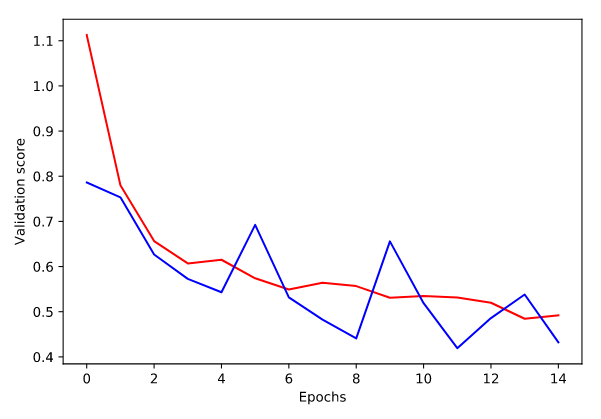

# Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

Instructions

1. Specify a model called model_2 that is like model_1, but which has 3 hidden layers of 50 units instead of only 1 hidden layer.
        
 - Use input_shape to specify the input shape in the first hidden layer.

 - Use 'relu' activation for the 3 hidden layers and 'softmax' for the output layer, which should have 2 units.
    
2. Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
    
3. Hit 'Submit Answer' to fit both the models and visualize which one gives better results! For both models, you should look for the best val_loss and val_acc, which won't be the last epoch for that model.


In [ ]:
# Model_1 Summary
_______________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
=================================================================
Total params: 652.0
Trainable params: 652
Non-trainable params: 0.0
_________________________________________________________________
None

In [ ]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation = 'relu', input_shape=input_shape))
model_2.add(Dense(50, activation = 'relu', input_shape=input_shape))
model_2.add(Dense(50, activation = 'relu', input_shape=input_shape))

# Add the output layer
model_2.add(Dense(2, activation = 'softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

Conclusion

Great work! The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.

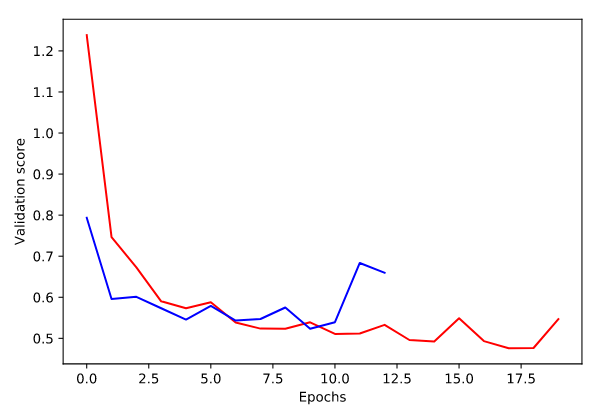

# Thinking about model capacity

1. Thinking about model capacity

At this point, you know how to run experiments, and compare different models performance. However, it takes some practice to get an intuition for what experiments or architectures to try. There is still a little more art to finding good deep learning architectures than there is for tuning other machine learning algorithms. But something called "model capacity" should be one of the key considerations you think about when deciding what models to try."Model capacity" or "network capacity" is closely related to the terms overfitting and underfitting.
2. Overfitting

You may recall overfitting and a graphic like this from a previous DataCamp course. Overfitting is the ability of a model to fit oddities in your training data that are there purely due to happenstance, and that won't apply in a new dataset. When you are overfitting, your model will make accurate predictions on training data, but it will make inaccurate predictions on validation data and new datasets. Underfitting is the opposite. That is when your model fails to find important predictive patterns in the training data. So it is accurate in neither the training data nor validation data. Because we want to do well on new datasets that weren't used for training the model, our validation score is the ultimate measure of a model's predictive quality. Let's get back to model capacity. Model capacity is a model's ability to capture predictive patterns in your data. So, the more capacity a model, the further to the right we will be on this graph. If you had a network, and you increased the number of nodes or neurons in a hidden layer, that would increase model capacity. And if you add layers, that increases capacity. Said another way, making larger layers or increasing the number of layers moves you further to the right of this graph. So, with that in mind,
3. Workflow for optimizing model capacity

here is a good workflow for you. Start with a simple network, and get the validation score. Then keep adding capacity as long as the score keeps improving. Once it stops improving, you can decrease capacity slightly, but you are probably near the ideal.
4. Sequential experiments

Let's walk through that process once. Here, I've started a model that has one hidden layer and 100 units. That's a relatively simple, or low capacity, model. I get a mean squared error
5. Sequential experiments

of 5-point-4. Since I started with a simple model, I now try increasing capacity. I could increase the number of layers or use more hidden nodes. I'll start by using more nodes in the one hidden layer. That improved the model, so I'll keep increasing capacity.
6. Sequential experiments

This time I'll switch to using 2 hidden layers. Each layer has 250 nodes. That improved the error more. So, I try 3 layers, continuing to add capacity as long as it helps.
7. Sequential experiments

This hurt the score. So, the model with 2 layers and 250 nodes is about perfect. I'll try another model that reduces capacity slightly from the last model I built.
8. Sequential experiments

That is 3 hidden layers with 200 nodes each. That seems the best model yet. So I'll stick with that. Should you change capacity by adding layers or by adding nodes to an existing layer? There isn't a universal answer to that. You can experiment. But you should generally be thinking about whether you are trying to increase or decrease capacity, ideally honing in on the right capacity by looking at validation scores. -
9. Let's practice!

# Experimenting with model structures

You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

Possible Answers

1. Try a new network with fewer layers than anything you have tried yet.
 - Incorrect - reducing the number of layers is unlikely to improve performance.

2. Use more units in each hidden layer.
 - Incorrect - Well done! Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.

3. Use fewer units in each hidden layer.
 - Incorrect - Not quite - using fewer units in each hidden layer is unlikely to improve performance.'

# Stepping up to images

1. Stepping up to images

To close, you are going to apply your knowledge to a new and different dataset.
2. Recognizing handwritten digits

This is the MNIST dataset, which contains images of handwritten digits. This is a very popular dataset for getting started working with images. There is an image of each handwritten digit, and each image is composed of a 28 pixel by 28 pixel grid. The image is represented by showing how dark each pixel is. So, 0 would be as light as possible, and 255 is as dark as possible. I've flattened the 28 x 28 grid for you into a 784 x 1 array for each image. Each image shows a digit like 0, 1, 2, 3 4, all the way up to 9. Your model will predict which digit it is that was written. So you will create a deep learning model taking in those 784 features for each image as inputs, and predicting digits from among 10 possible values for the output. -
3. Let's practice!

# Building your own digit recognition model

You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Ready to take your deep learning to the next level? Check out [Advanced Deep Learning with Keras](https://www.datacamp.com/courses/advanced-deep-learning-with-keras-in-python) in Python to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at ["Convolutional Neural Networks for Image Processing"](https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing) to learn image-specific applications of Keras.

Instructions

1. Create a Sequential object to start your model. Call this model.

2. Add the first Dense hidden layer of 50 units to your model with 'relu' activation. For this data, the input_shape is (784,).

3. Add a second Dense hidden layer with 50 units and a 'relu' activation function.

4. Add the output layer. Your activation function should be 'softmax', and the number of nodes in this layer should be the same as the number of possible outputs in this case: 10.

5. Compile model as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].

6. Fit the model using X and y using a validation_split of 0.3.


In [ ]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation = 'relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation = 'relu', input_shape=(784,)))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split = 0.3)

'''
<script.py> output:
    Train on 1750 samples, validate on 750 samples
    Epoch 1/10
    
  32/1750 [..............................] - ETA: 2s - loss: 2.1979 - acc: 0.2188
 544/1750 [========>.....................] - ETA: 0s - loss: 2.1415 - acc: 0.2518
1056/1750 [=================>............] - ETA: 0s - loss: 1.9387 - acc: 0.3456
1600/1750 [==========================>...] - ETA: 0s - loss: 1.7294 - acc: 0.4375
1750/1750 [==============================] - 0s - loss: 1.6717 - acc: 0.4663 - val_loss: 1.0087 - val_acc: 0.7720
    Epoch 2/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.9445 - acc: 0.7500
 576/1750 [========>.....................] - ETA: 0s - loss: 0.7594 - acc: 0.8385
1120/1750 [==================>...........] - ETA: 0s - loss: 0.7221 - acc: 0.8313
1664/1750 [===========================>..] - ETA: 0s - loss: 0.6792 - acc: 0.8311
1750/1750 [==============================] - 0s - loss: 0.6765 - acc: 0.8297 - val_loss: 0.5309 - val_acc: 0.8640
    Epoch 3/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.3715 - acc: 0.9688
 512/1750 [=======>......................] - ETA: 0s - loss: 0.4189 - acc: 0.8965
 928/1750 [==============>...............] - ETA: 0s - loss: 0.4044 - acc: 0.8987
1312/1750 [=====================>........] - ETA: 0s - loss: 0.3986 - acc: 0.8986
1664/1750 [===========================>..] - ETA: 0s - loss: 0.4164 - acc: 0.8882
1750/1750 [==============================] - 0s - loss: 0.4164 - acc: 0.8869 - val_loss: 0.4478 - val_acc: 0.8667
    Epoch 4/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.1797 - acc: 0.9375
 544/1750 [========>.....................] - ETA: 0s - loss: 0.2932 - acc: 0.9320
1088/1750 [=================>............] - ETA: 0s - loss: 0.3258 - acc: 0.9136
1632/1750 [==========================>...] - ETA: 0s - loss: 0.3286 - acc: 0.9087
1750/1750 [==============================] - 0s - loss: 0.3222 - acc: 0.9103 - val_loss: 0.3898 - val_acc: 0.8800
    Epoch 5/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.1696 - acc: 0.9375
 352/1750 [=====>........................] - ETA: 0s - loss: 0.2529 - acc: 0.9347
 704/1750 [===========>..................] - ETA: 0s - loss: 0.2738 - acc: 0.9233
1088/1750 [=================>............] - ETA: 0s - loss: 0.2513 - acc: 0.9320
1504/1750 [========================>.....] - ETA: 0s - loss: 0.2476 - acc: 0.9302
1750/1750 [==============================] - 0s - loss: 0.2588 - acc: 0.9280 - val_loss: 0.3684 - val_acc: 0.8947
    Epoch 6/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.0787 - acc: 1.0000
 576/1750 [========>.....................] - ETA: 0s - loss: 0.1956 - acc: 0.9531
1120/1750 [==================>...........] - ETA: 0s - loss: 0.1988 - acc: 0.9527
1600/1750 [==========================>...] - ETA: 0s - loss: 0.2033 - acc: 0.9481
1750/1750 [==============================] - 0s - loss: 0.2079 - acc: 0.9457 - val_loss: 0.3472 - val_acc: 0.8933
    Epoch 7/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.1727 - acc: 0.9375
 448/1750 [======>.......................] - ETA: 0s - loss: 0.1584 - acc: 0.9665
 960/1750 [===============>..............] - ETA: 0s - loss: 0.1633 - acc: 0.9625
1504/1750 [========================>.....] - ETA: 0s - loss: 0.1727 - acc: 0.9574
1750/1750 [==============================] - 0s - loss: 0.1708 - acc: 0.9577 - val_loss: 0.3291 - val_acc: 0.8947
    Epoch 8/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.0899 - acc: 1.0000
 448/1750 [======>.......................] - ETA: 0s - loss: 0.1647 - acc: 0.9643
 864/1750 [=============>................] - ETA: 0s - loss: 0.1436 - acc: 0.9711
1344/1750 [======================>.......] - ETA: 0s - loss: 0.1391 - acc: 0.9695
1750/1750 [==============================] - 0s - loss: 0.1406 - acc: 0.9691 - val_loss: 0.3218 - val_acc: 0.9040
    Epoch 9/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.0529 - acc: 1.0000
 512/1750 [=======>......................] - ETA: 0s - loss: 0.0854 - acc: 0.9902
 928/1750 [==============>...............] - ETA: 0s - loss: 0.1023 - acc: 0.9860
1408/1750 [=======================>......] - ETA: 0s - loss: 0.1074 - acc: 0.9837
1750/1750 [==============================] - 0s - loss: 0.1140 - acc: 0.9806 - val_loss: 0.3395 - val_acc: 0.8947
    Epoch 10/10
    
  32/1750 [..............................] - ETA: 0s - loss: 0.1628 - acc: 0.9688
 576/1750 [========>.....................] - ETA: 0s - loss: 0.1181 - acc: 0.9740
1088/1750 [=================>............] - ETA: 0s - loss: 0.1004 - acc: 0.9816
1536/1750 [=========================>....] - ETA: 0s - loss: 0.0995 - acc: 0.9805
1750/1750 [==============================] - 0s - loss: 0.0980 - acc: 0.9811 - val_loss: 0.3139 - val_acc: 0.9013
'''

Conclusion

Congrats! You've done something pretty amazing. You should see better than 90% accuracy recognizing handwritten digits, even while using a small training set of only 1750 images!

# Final thoughts

1. Final thoughts

Congrats. You are on your way to using the most fun and powerful modeling technique around.
2. Next steps

There is still an immense amount to learn as you become a deep learning master. But it's like riding a bike. The hardest part is getting to the point where you can practice on your own, and you are there. You'll probably enjoy experimenting with deep learning using the same types of data you've used before for predictive modeling, tables of numeric data like what you commonly see in a pandas DataFrame or numpy array. From there, many people start working with images, using something called convolutional neural networks. But you could decide you want to focus on text. Or sound. Or you might get creative and apply deep learning to data others haven't even thought of. You'll find it's a powerful technique as you get the hang of it. Kaggle is a great place to find datasets to work with, and their forums are a great place to keep learning. As you get more advanced, start checking out the wikipedia page titled "List of datasets for machine learning research." It includes datasets from some very interesting domains. Keras has excellent documentation. When there's something specific to look up, keras-dot-io is likely to have the answer. The keras and tensorflow repositories on github also have nice examples to work from. As you start working with larger datasets and more complex deep learning models, you may find these models can take a long time to fit. If you have a computer with a graphical processing unit, or GPU, you may be able to set up TensorFlow to use that GPU for computation. This generally requires a GPU that meets a standard called CUDA compatibility. Most GPU's made by NVIDIA are CUDA compatible. If you don't have a computer with a CUDA compatible GPU, here is a link with instructions about setting up a deep learning environment in the cloud that can run your models on a GPU. More than anything, share your work online, and have fun. If you keep experimenting and build out on the tools you've learned, you'll soon be amazed at what you can do.
3. Let's practice!